# Introduction to Neural Network (Keras + Tensorflow)

Version: 2024-8-6

The widespread adoption of artificial intelligence in recent years has been largely driven by advancement in neural networks. 

Neural network is fundamentally numeric computation, so any software with decent numeric computation capabilities can be used to construct and train a neural network. That said, while in theory you can construct a neural network in Excel, in practice it will be very troublesome since Excel is not designed with neural network in mind. Modern neural network applications have consolidated around three platforms:
- [Tensorflow](https://www.tensorflow.org/) from Google.
- [Flax](https://github.com/google/flax), also from Google.
- [PyTorch](http://pytorch.org/), originally from Meta but now managed by an independent foundation.

At the lowest level, these platforms are essentially NumPy with the ability to run on GPUs. 
We do not want to write the basic building blocks of neural networks from scratch, however
if we are just trying to learn how they work.
Therefore in this course, we will focus on two types of components that build on top of these platforms:

1. **High-level API for constructing neural network**: 
    [`keras`](https://keras.io/) of Tensorflow and and 
    [`nn.Module`](https://pytorch.org/docs/stable/nn.html) of PyTorch 
    provides ready-to-use building blocks for the construction of neural networks.
2. **Libraries that provides access to fully-trained models**. 
    The most prominent examples are Hugging Face's [Transformers](https://huggingface.co/docs/transformers/index) 
    and [fastai](https://github.com/fastai/fastai).

In this notebook we will focus on using <a href="https://keras.io/">```keras```</a>, which is a high-level library for constructing neural networks. Keras runs on top of a numerical computation library of your choice, defaulting to ```tensorflow```. A library such as Keras significantly simplify the workflow of constructing and training neural networks. 

<img src="https://scrp.econ.cuhk.edu.hk/workshops/ai/images/nn_libraries_2024.png" width="80%">

Before we start, we will first disable the server's GPU so that everything runs on its CPU. Later we will turn it back on to see how much speed up we can get. This setting has no effect if you do not have a (Nvidia) GPU.

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

## A Simple Example: Binary Neural Network Classifier

As a first example, we will train a neural network to the following classification task:

|$y$|$x_1$|$x_2$|
|-|-|-|
|0|1|2|
|1|0|5|

with $y$ being $1 - x_1$ and $x_2$ being just an irelevant random number.

To be clear: there is absolutely no need to use neural network for such as simple task. A simpler model such as logit will train a lot faster and potentially with better accuracy.

We first load the data:

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

# Import data
data = pd.read_csv("../data/D1-data-1.csv")
y = data['y']
X = data[['x1','x2']]

#Shuffle and split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)

We will construct a neural network classifier for this task. 

A neural network model is made up of multiple layers. The simpliest model would have three layers:
- An *input layer*. This layer specify the nature of the input data. In this example, we only need to tell Keras that we have two variables to input.
- A *hidden layer*. This layer contains neuron(s) that process the input data.
- An *ouput layer*. The neurons in this layer process the output from the hidden layer and generate predictions. This layer contains as many neurons as the number of target variables we try to predict. 

Below is the simplest neural network one can come up with, with only one hidden neuron. The neuron computes the following function:
}
$$
F \left( b + \sum\nolimits_{i}{w_{i}x_{i}} \right)
$$

where $x_i$ are inputs, b the intercept (called *bias* in machine learning), $w_i$ coefficients (called *weights*) and $F$ is an *activation function*. In this example we will use the logistic function (also called the *sigmoid function*) as the activation function:

$$
F(z) = \frac{e^z}{1+e^z}
$$

So the neuron is essentially a logit regression.

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard

# Logging
tensorboard_callback = TensorBoard(log_dir="./logs/part-a")

# Set up layers 
inputs = Input(shape=(2,))
x = Dense(1, activation='sigmoid')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

# Set up model
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# starts training
model.fit(X_train,
          y_train,
          epochs=50,
          callbacks=[tensorboard_callback])

2024-08-06 22:07:15.466805: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 22:07:15.484149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 22:07:15.489478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 22:07:15.501551: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 22:07:17.132726: W tensorflow/compiler/tf2

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4982 - loss: 0.7326 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4914 - loss: 0.7263
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5238 - loss: 0.7067
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5046 - loss: 0.7083
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5071 - loss: 0.7042
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4951 - loss: 0.7031 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4851 - loss: 0.7032 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.4560 - loss: 0.6967
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4238 - loss: 0.7008
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4920 - loss: 0.6969
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5166 - loss: 0.6941
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5148

Out-of-sample test can be conducted with ```model.evaluate()```:

In [4]:
model.evaluate(x=X_test,y=y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - accuracy: 1.0000 - loss: 0.6148


[0.6176896691322327, 1.0]

The first number is the model's loss while the subsequent numbers are the metrics we specified. In our case, they are ```binary_crossentropy``` and ```accuracy``` respectively.

Unlike OLS, a neural network's performance could vary across runs. Run the code a few more times and see how the performance vary.

Make prediction (this is called *inference* in machine learning) with ```model.predict()```:

In [5]:
x = np.array([[0,1]])
print(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.54273987]]


## Activations

Different activation can have profound impact on model performance. Besides ```sigmoid```, which is just a different name for the logistic function, there are other activation function such as ```tanh``` and ```relu```. ```relu```, which stands for **RE**ctified **L**inear **U**nit, is a particular common choice due to its good performance.

In [6]:
# Replace 'sigmoid' with 'relu' for the hidden layer
inputs = Input(shape=(2,))
x = Dense(1, activation='relu')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs,outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,
          y_train,
          epochs=50,
          callbacks=[tensorboard_callback])

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4816 - loss: 0.6932 
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5153 - loss: 0.6931 
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5054 - loss: 0.6931 
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5103 - loss: 0.6931 
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5112 - loss: 0.6931 
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5065 - loss: 0.6931 
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4992 - loss: 0.6932 
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4989 - loss: 0.6932 
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5050 - loss: 0.6931
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5018 - loss: 0.6932 
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5057 - loss: 0.6931
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.

Why is ReLU preferred over the logistic function? Let us take a look at the shape of each function:

<img src="https://scrp.econ.cuhk.edu.hk/workshops/ai/images/logistic_v_relu.png">

The most prominent feature of the logistic function is that it is bounded between 0 and 1. This means it is virtually flat for very large or very small input values, and flat means small gradient. As gradient descent relies on gradient to learn, small gradient implies slow learning. ReLU avoids this issue by being linear above zero.

## Early Stopping

As you might have observed above, the network often converge to satisfactory performance 
before it wen through our specified number of epochs. 
We can use *early stopping* to terminate the training when performance improvement gets 
below a given threshold. The performance metrics used in early stopping is generally the 
model's loss computed on the *validation* set, which is a third dataset in addition to
the training set and test set. The reason for this is to prevent the model from overfitting
to the training data.  

The main adjustable settings for early stopping are:
- *patience*: how many epochs without improvement before stopping the training.
- *min_delta*: the minimum change in the monitored metrics to qualify as an improvement.

We can ask Keras to split the input data into training set and validation set by specifying
the percentage of data to assign to the latter.



In [7]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=3,
                                       min_delta=0.1)

inputs = Input(shape=(2,))
x = Dense(1, activation='relu')(inputs)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs,outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,
          y_train,
          epochs=50,
          validation_split=0.1,
          callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5133 - loss: 0.6932 - val_accuracy: 0.4933 - val_loss: 0.6932
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.4933 - val_loss: 0.6932
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4902 - loss: 0.6932 - val_accuracy: 0.5067 - val_loss: 0.6931
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5183 - loss: 0.6931 - val_accuracy: 0.5067 - val_loss: 0.6931


## Dropout

As neural networks are highly flexible, they can easily overfit. Dropout is a regularization technique that works by randomly setting the outputs of some neurons to zero, thereby forcing the network to not rely too much on a specific neurons or feature. The function below added a 50% dropout to the hidden layer:

In [8]:
from tensorflow.keras.layers import Dropout

inputs = Input(shape=(2,))
x = Dense(1, activation='relu')(inputs)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs,outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,
          y_train,
          epochs=50,
          validation_split=0.1,
          callbacks=[tensorboard_callback,earlystopping_callback])

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5118 - loss: 0.6931 - val_accuracy: 0.5067 - val_loss: 0.6931
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 0.6931 - val_accuracy: 0.5067 - val_loss: 0.6931
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5146 - loss: 0.6931 - val_accuracy: 0.5067 - val_loss: 0.6931


## Neural Network Regression

Next we are going use a neural network in a regression task. The true data generating process (DGP) is as follows:

$$
y = x^5 -2x^3 + 6x^2 + 10x - 5
$$

The model does not know the true DGP, so it needs to figure out the relationship between $y$ and $x$ from the data.

First we generate the data:

In [9]:
#Generate 1000 samples
X = np.random.rand(1000,1)
y = X**5 - 2*X**3 + 6*X**2 + 10*X - 5

#Shuffle and split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y)

Then we construct the model:

In [11]:
# Logging
tensorboard_callback = TensorBoard(log_dir="./logs/part-b")

# Early stopping
earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=3,
                                       min_delta=0.05)

# Single hidden layer with 100 neurons
inputs = Input(shape=(1,))
x = Dense(100, activation='relu')(inputs)
predictions = Dense(1, activation='linear')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['R2Score'])
model.fit(X_train,
          y_train,
          epochs=200,
          validation_split=0.1,
          callbacks=[tensorboard_callback,earlystopping_callback])
model.evaluate(x=X_test,y=y_test)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - R2Score: -0.0983 - loss: 18.9156 - val_R2Score: -0.1247 - val_loss: 18.9427
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: -0.0709 - loss: 18.9133 - val_R2Score: -0.0631 - val_loss: 17.9049
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - R2Score: -0.0166 - loss: 17.5013 - val_R2Score: -0.0079 - val_loss: 16.9765
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - R2Score: 0.0389 - loss: 17.2615 - val_R2Score: 0.0438 - val_loss: 16.1055
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - R2Score: 0.0768 - loss: 16.1404 - val_R2Score: 0.0963 - val_loss: 15.2200
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.1139 - loss: 15.4544 - val_R2Score: 0.1427 - val_loss: 14.4386
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.1598 - loss: 14.9276 - val_R2Score: 0.1831 - val_loss: 13.7587
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - R2Score: 0.1951 - loss: 15.5256 - val_R2Score: 0.21

[1.258675456047058, 0.9349938631057739]

We are going to run the model through different settings. The function contains everything we have coded previously:

In [28]:
import time
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow.keras.backend as backend

def polyNN(data,
           hidden_count=100,
           epochs=200,
           batch_size=32,
           activation='relu',
           patience=3,
           min_delta=0.01):
    
    #Record the start time
    start = time.time()
    
    #Unpack the data
    X_train, X_test, y_train, y_test = data

    # Logging
    tensorboard_callback = TensorBoard(log_dir=f"./logs/part-b-{hidden_count}-{batch_size}-{activation}")

    # Early stopping
    earlystopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=patience,
                                       min_delta=min_delta)   
    
    #Layers
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(hidden_count, activation=activation)(inputs)
    predictions = Dense(1, activation='linear')(x)

    #Model
    model = Model(inputs=inputs, outputs=predictions)
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['R2Score'])
    model.fit(X_train,
              y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_split=0.1,
              callbacks=[tensorboard_callback,earlystopping_callback],             
              verbose=0) #Do not display progress
    
    #Collect and display info
    param_count = model.count_params()
    loss_tr = round(model.evaluate(x=X_train,
                                   y=y_train,
                                   batch_size=batch_size,
                                   verbose=0)[1],
                    4)
    loss_te = round(model.evaluate(x=X_test,
                                   y=y_test,
                                   batch_size=batch_size,
                                   verbose=0)[1],
                    4)
    elapsed = round(time.time() - start,2)    
    print("Hidden neurons:",str(hidden_count).ljust(5),
          "Total param:",str(param_count).ljust(6),
          "R2 (train,test):",str(loss_tr).ljust(7),str(loss_te).ljust(7),
          "Epoch:",str(earlystopping_callback.stopped_epoch).ljust(4),
          "Time:",str(elapsed)+"s",
         )
    
    backend.clear_session()

`clear_session()` is called at the end of the function to clear existing models from memory. This is important if you are working with multiple models&mdash;for example, when you run through different sets of hyperparameters&mdash;to avoid running out of memory.

Now we can easily try out different settings:

In [29]:
data = train_test_split(X,y)

polyNN(data,hidden_count=1)
polyNN(data,hidden_count=10)
polyNN(data,hidden_count=50)
polyNN(data,hidden_count=100)
polyNN(data,hidden_count=500)

Hidden neurons: 1     Total param: 4      R2 (train,test): -0.0097 -0.0029 Epoch: 101  Time: 8.01s
Hidden neurons: 10    Total param: 31     R2 (train,test): 0.9206  0.9173  Epoch: 0    Time: 14.9s
Hidden neurons: 50    Total param: 151    R2 (train,test): 0.9794  0.978   Epoch: 0    Time: 14.99s
Hidden neurons: 100   Total param: 301    R2 (train,test): 0.9809  0.9795  Epoch: 0    Time: 15.09s
Hidden neurons: 500   Total param: 1501   R2 (train,test): 0.9847  0.9836  Epoch: 0    Time: 15.33s


(Note: `Epoch: 0` means the model did not stop early.)

Here we see the universal approximation theorem in work: the more neurons we have the better the fit.

One trick that can often improve performance: *standardizing* data.

In [24]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler().fit(X)
X_std = scalar.transform(X)

data_std = train_test_split(X_std,y)

polyNN(data_std,hidden_count=1)
polyNN(data_std,hidden_count=10)
polyNN(data_std,hidden_count=50)
polyNN(data_std,hidden_count=100)
polyNN(data_std,hidden_count=500)

Hidden neurons: 1     Total param: 4      R2 (train,test): 0.9692  0.9648  Epoch: 0    Time: 14.78s
Hidden neurons: 10    Total param: 31     R2 (train,test): 0.9865  0.9878  Epoch: 42   Time: 3.77s
Hidden neurons: 50    Total param: 151    R2 (train,test): 0.9969  0.9971  Epoch: 66   Time: 5.59s
Hidden neurons: 100   Total param: 301    R2 (train,test): 0.9976  0.9979  Epoch: 52   Time: 4.55s
Hidden neurons: 500   Total param: 1501   R2 (train,test): 0.9993  0.9994  Epoch: 31   Time: 3.1s


While `StandardScaler` works quite well when there is only a single feature, its sensitivity to outliers makes it unsuitable for situations with mulitple highly unbalanced features. Scikit-learn offers <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py">other scalers</a> such as `RobustScaler` that might work better in those cases. 


## Speed Things Up

Due to its complexity, neural network trains a lot slower than the other techniques we have covered previously. To speed up training, we can ask Keras to go through more samples before updating the model's parameters by specifying a larger ```batch_size```. Doing so allows Keras to make better use of the CPU's parallel processing capabitilies.

Keras' default batch size is 32. We will try 128 instead:

In [56]:
batch_size = 128
polyNN(data_std,hidden_count=1,batch_size=batch_size)
polyNN(data_std,hidden_count=10,batch_size=batch_size)
polyNN(data_std,hidden_count=50,batch_size=batch_size)
polyNN(data_std,hidden_count=100,batch_size=batch_size)
polyNN(data_std,hidden_count=500,batch_size=batch_size)

Hidden count: 1     Parameters: 4      R2 (train,test): 0.5344  0.5158  Time: 6.85s
Hidden count: 10    Parameters: 31     R2 (train,test): 0.8837  0.8907  Time: 7.06s
Hidden count: 50    Parameters: 151    R2 (train,test): 0.9916  0.9914  Time: 7.23s
Hidden count: 100   Parameters: 301    R2 (train,test): 0.9954  0.9955  Time: 7.31s
Hidden count: 500   Parameters: 1501   R2 (train,test): 0.9994  0.9994  Time: 8.34s


Holding the number of epochs constant, what you should see with a larger batch size is faster training but also larger error. The latter is due to the fact that we are updating the parameters less often, resulting in slower learn. This can be countered by increasing the number of epochs.

## Running Model on GPU

If you have a GPU in your computer, you can now turn it on to see how much it speeds up the process of training.

In [46]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [30]:
polyNN(data,hidden_count=1)

Hidden count: 1     Parameters: 4      loss (train,test): 9.147   8.3436  Time: 1.8s


With a GPU you can take advantage of its high number of core count by setting a much higher batch size, such as 1000:

In [ ]:
batch_size = 1000
polyNN(data,hidden_count=1,batch_size=batch_size)
polyNN(data,hidden_count=10,batch_size=batch_size)
polyNN(data,hidden_count=50,batch_size=batch_size)
polyNN(data,hidden_count=100,batch_size=batch_size)
polyNN(data,hidden_count=500,batch_size=batch_size)

To compensate for the less frequent update, we can increase the number of epochs:

In [ ]:
batch_size = 1000
epochs = 600
polyNN(data,hidden_count=1,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=10,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=50,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=100,epochs=epochs,batch_size=batch_size)
polyNN(data,hidden_count=500,epochs=epochs,batch_size=batch_size)

### MNIST
MNIST is a dataset of 70000 handwritten digits. It is often used to teach image recognition due to its simplicity. 

In [57]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Each sample consists of a 28x28 monochome image of a handwritten digit stored as a 2D numpy array:

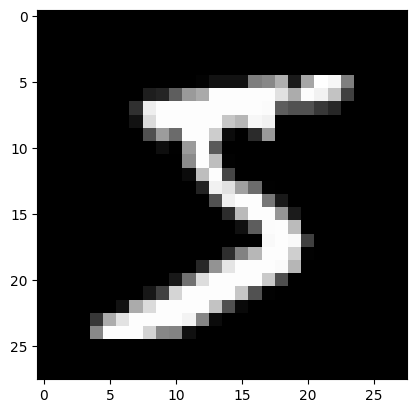

In [58]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.show()

Target is digit's value:

In [59]:
y_train[0]

5

For classification task, the common practice is to have one output neuron per class. We can use `keras.utils.to_categorical()` to convert the target value to a dummy vector:

In [60]:
y_train = keras.utils.to_categorical(y_train, 10)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

We will use a single-layer fully-connected network withe 100 hidden neurons. There are two more preprocessing tasks that we need to handle: flattening the 2D array into 1D and normalizing the features from 0-255 to 0-1:

In [61]:
# Settings
batch_size = 128
epochs = 30
pixel_count = 28 * 28
num_classes = 10 # target classes (0-9)

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten each image to a vector
x_train = x_train.reshape(len(x_train),pixel_count)
x_test = x_test.reshape(len(x_test),pixel_count)

# Normalize features
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model
inputs = Input(shape=(pixel_count,))
x = Dense(100, activation='relu')(inputs)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train and evaluate
model.fit(x_train,y_train,
          batch_size=batch_size,
          epochs=epochs)
model.evaluate(x_test,y_test)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.6384
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9463 - loss: 0.1882
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1324
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.1027
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0848
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9804 - loss: 0.0703
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0612
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0510
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0418
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0381
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0330
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

[0.0984564945101738, 0.9772999882698059]

With just 100 neurons we are able to achieve a 97% accuracy. With a more advanced convolutional network we should be able to do even better:

In [49]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

#Settings
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# The data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Features has to be in the following shape: (obs, rows, cols, color channels)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# Normalize features
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Construct model using sequential syntax
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
469/469 [==============================] - 11s 23ms/step - loss: 0.4829 - accuracy: 0.8476 - val_loss: 0.1021 - val_accuracy: 0.9673
Epoch 2/30
469/469 [==============================] - 10s 22ms/step - loss: 0.1680 - accuracy: 0.9511 - val_loss: 0.0669 - val_accuracy: 0.9776
Epoch 3/30
469/469 [==============================] - 10s 22ms/step - loss: 0.1230 - accuracy: 0.9640 - val_loss: 0.0568 - val_accuracy: 0.9811
Epoch 4/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0993 - accuracy: 0.9711 - val_loss: 0.0435 - val_accuracy: 0.9855
Epoch 5/30
469/469 [==============================] - 11s 22ms/step - loss: 0.0842 - accuracy: 0.9757 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 6/30
469/469 [==============================] - 11s 23ms/step - loss: 0.0764 - accuracy: 0.9781 - val_loss: 0.0366 - val_accuracy: 0.9882
Epoch 7/30
469/469 [==============================] - 10s 22ms/step - loss: 0.0703 - accuracy: 0.9799 - val_loss: 0.0349 - val_accuracy:

Here is a very nice 3D visualization of what is going on inside a trained CNN: https://www.cs.ryerson.ca/~aharley/vis/conv/.
I have set up the model above to resemble the one in the visualization. There are many hyperparameters that you can try adjusting to improve its performance&mdash;the number of layers, the number of filters, the size of the kernel, the type of activation and dropout ratio, etc.